In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math

import acquire
import prepare

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Plan

#### Summary

#### 1. Do customers with less add-ons churn at a higher rate than those with more add ons?
   The thought process behind this being that customers with more add-ons are less likely to churn because they are dependent on the additional service components (e.g. security packages, tech support, etc.)
#### 2. Do customers with spouses and children churn less those those who do not have any dependents?
   The thought process behind this being that customers who have children or spouses are less likely to churn so that their family can also have internet. Perhaps, for advertisement we can use this as a advertising point.
#### 3. Are Senior citizens more or less likely to churn than non Senior Citizens?
   The thought process behind this being that Senior citizens tend to churn less due to the extenuous effort that comes with terminating contracts.
#### 4. Is there a point where contracts become too expensive, causing customers to churn?
   The thought process being that other companiies may be targeting customers who have high priced contracts and offering them better deals, so at what point is the contract price too much.

# Acquire

In [2]:
df = acquire.get_telco_data()
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [3]:
# Get a summary on the data frame incl. data types, shape and memory storage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# Checking for any columns with an abundant amount of nulls
df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

# Prepare

In [5]:
# Changing the data tyoe of "TotalCharges" and "tenure" to float.
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [6]:
df['tenure'].astype(float)

0        9.0
1        9.0
2        4.0
3       13.0
4        3.0
        ... 
7038    13.0
7039    22.0
7040     2.0
7041    67.0
7042    63.0
Name: tenure, Length: 7043, dtype: float64

In [7]:
# Looping through the columns to get unique values per column.
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique payment_type_id's count: 4
[2 1 4 3]

Unique internet_service_type_id's count: 3
[1 2 3]

Unique contract_type_id's count: 3
[2 1 3]

Unique customer_id's count: 7043
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Unique gender's count: 2
['Female' 'Male']

Unique senior_citizen's count: 2
[0 1]

Unique partner's count: 2
['Yes' 'No']

Unique dependents's count: 2
['Yes' 'No']

Unique tenure's count: 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Unique phone_service's count: 2
['Yes' 'No']

Unique multiple_lines's count: 3
['No' 'Yes' 'No phone service']

Unique online_security's count: 3
['No' 'Yes' 'No internet service']

Unique online_backup's count: 3
['Yes' 'No' 'No internet service']

Unique device_protection's count: 3
['No' 'Yes' 'No internet service']



In [8]:
# Next step i will do is to go through and encode the values 
# in the dataframe that are in Yes/No form.
YN_features = ['churn', "paperless_billing","phone_service","dependents","partner"]

def bool_encoding(YN_features, df):
    for i in YN_features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

bool_encoding(YN_features, df)
df

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,1,1,9,1,...,Yes,Yes,No,1,65.60,593.30,0,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,0,0,9,1,...,No,No,Yes,0,59.90,542.40,0,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,0,0,4,1,...,No,No,No,1,73.90,280.85,1,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,1,0,13,1,...,No,Yes,Yes,1,98.00,1237.85,1,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,1,0,3,1,...,Yes,Yes,No,1,83.90,267.40,1,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,0,0,13,1,...,Yes,No,No,0,55.15,742.90,0,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,1,0,22,1,...,No,No,Yes,1,85.10,1873.70,1,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,0,0,2,1,...,No,No,No,1,50.30,92.75,0,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,1,1,67,1,...,Yes,No,Yes,0,67.85,4627.65,0,Two year,DSL,Mailed check


In [9]:
# Encoding multiple lines so that if they don't have multiple lines of phone serivce will be a 0
df['multiple_lines'] = df.multiple_lines.map({'Yes': 1, 'No': 0, 'No phone service' : 0})

In [10]:
# Now to encode the gender column, males will be 1 and females will be 0
df['is_male'] = df.gender.map({'Male': 1, 'Female': 0})

In [11]:
df['number_relationships'] = df['dependents'] + df['partner']

In [12]:
# Dropping the gender column after encoding it
df.drop(columns='gender', inplace=True)
df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,is_male,number_relationships
0,2,1,2,0002-ORFBO,0,1,1,9,1,0,...,No,1,65.6,593.3,0,One year,DSL,Mailed check,0,2
1,2,1,1,0003-MKNFE,0,0,0,9,1,1,...,Yes,0,59.9,542.4,0,Month-to-month,DSL,Mailed check,1,0


In [13]:
# Generated new column "num_addons" by summing up the number of add-on services.
df['num_addons'] = (df[['online_security', \
                        'online_backup', \
                        'device_protection', \
                        'tech_support', \
                        'streaming_tv', \
                        'streaming_movies', \
                        'contract_type', \
                        'internet_service_type', \
                        'payment_type']] == 'Yes').sum(axis=1)


In [14]:
dummy_df = pd.get_dummies(df[['online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
df = pd.concat( [df, dummy_df], axis=1 )

# TRAIN, VAL, TEST SPLIT

In [15]:
train, validate, test = prepare.my_train_test_split(df, target = 'churn')


# Data Exploration

In [16]:
#using the Fivethirtyeight style for all plots to improve readability
plt.style.use("fivethirtyeight")

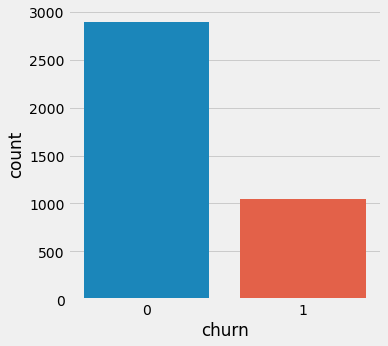

In [17]:
# First thing, i will see the churn distribution for the entire dataset.
# Display a frequency distribution for churn. 
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=train['churn'], linewidth=1)
plt.show()

In [18]:
# Create a function to generate countplots:

plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def countplot(x, y, train):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=train, alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

### Do number of add-ons affect rate of churn?

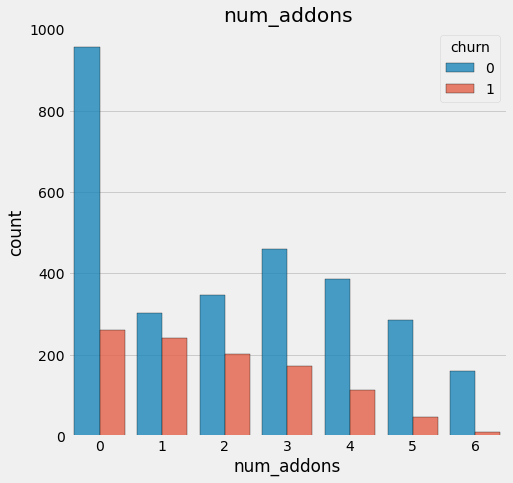

In [19]:
# First thing, i will see the churn distribution for the entire dataset.
# Display a frequency distribution for churn. 
countplot("churn", ["num_addons"], train)

#### Takeaways
- Churn rate goes down as the number of add-ons increases


### Do customers with partners and dependents churn more than those with no dependents?

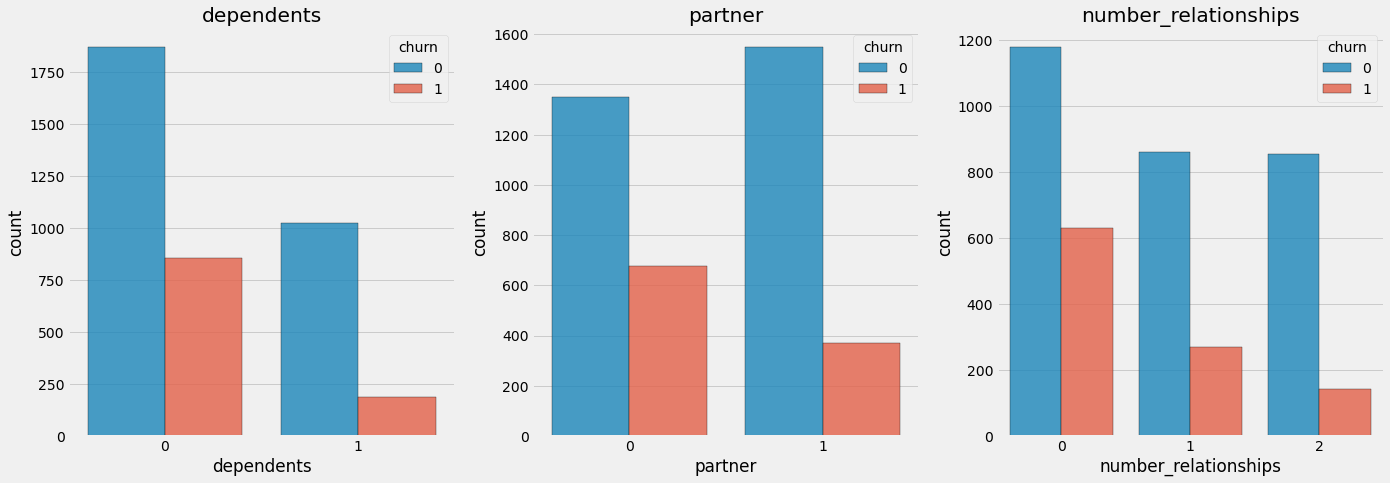

In [20]:
# Generate countplots for various features.
countplot("churn", ["dependents","partner","number_relationships"], train)

#### Takeaways
- Customers who do not have dependents or do not have a partner churn at a higher rate than those who do
- It is also seen that customers who have both dependents and a partner churn at a much lower rate than those who do not have either.

### Are Senior citizens more or less likely to churn than non Senior Citizens?

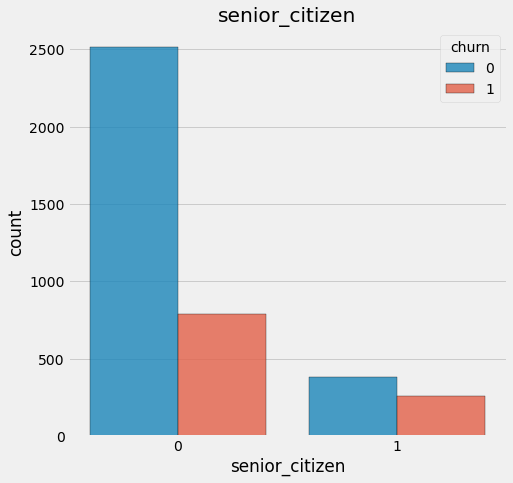

In [21]:
countplot("churn", ["senior_citizen"], train)
plt.show()

#### Takeaways
- Senior citizens churn at a lower rate than those who are not senior citizens.

### Does tenure affect churn?

Text(0, 0.5, 'Churn')

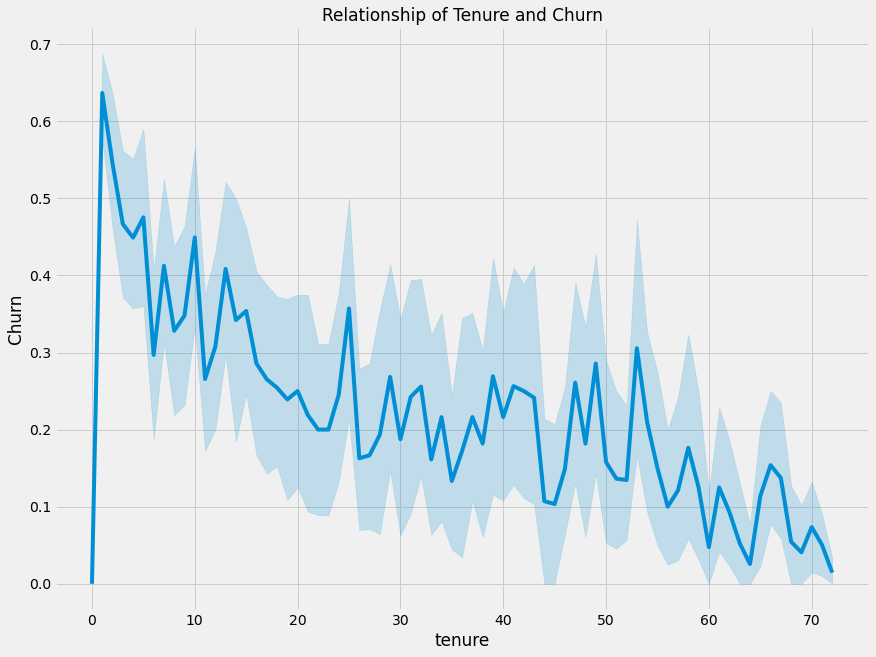

In [22]:
# Generating lineplot to show totoal charge to churn
plt.figure('figure', figsize=(13, 10))
plt.title("Relationship of Tenure and Churn", fontsize=17)
ax = sns.lineplot(x="tenure", y="churn", data=train)
plt.ylabel('Churn')

#### Takeaways
- Churn rate goes down as tenure with the company goes up.

### Number of add-ons statistical testing
(H_0): Rate of churn is not dependent on number of add-ons.\
(H_a): Rate of churn is dependent on number of add-ons.

In [23]:
addon_observed = pd.crosstab(train.num_addons, train.churn)
addon_observed

churn,0,1
num_addons,,
0,956,261
1,303,242
2,348,201
3,459,171
4,385,114
5,286,47
6,160,10


In [24]:
chi2, p, degf, expected = stats.chi2_contingency(addon_observed)

alpha = .05

#output values
print('Observed')
print(addon_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[956 261]
 [303 242]
 [348 201]
 [459 171]
 [385 114]
 [286  47]
 [160  10]]

Expected
[[894 322]
 [400 144]
 [403 145]
 [462 167]
 [366 132]
 [244  88]
 [124  45]]

----
chi^2 = 201.2178
p     = 1.0446961238936798e-40


In [25]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Dependent/Partner statistical analysis
(H_0): Rate of churn is not dependent on whether a customer has a dependent or partner.\
(H_a): Rate of churn is dependent on whether a customer has a dependent or partner.

In [26]:
partner_observed = pd.crosstab(train.partner, train.churn)
partner_observed

churn,0,1
partner,,
0,1349,675
1,1548,371


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(partner_observed)

alpha = .05

#output values
print('Observed')
print(partner_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1349  675]
 [1548  371]]

Expected
[[1487  536]
 [1409  509]]

----
chi^2 = 98.5779
p     = 3.124807670665349e-23


In [28]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [29]:
dep_observed = pd.crosstab(train.dependents, train.churn)
dep_observed

churn,0,1
dependents,,
0,1871,859
1,1026,187


In [30]:
chi2, p, degf, expected = stats.chi2_contingency(dep_observed)

alpha = .05

#output values
print('Observed')
print(dep_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[1871  859]
 [1026  187]]

Expected
[[2005  724]
 [ 891  321]]

----
chi^2 = 110.1619
p     = 9.030713272299022e-26


In [31]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Senior Citizen statistical testing.
(H_0): Rate of churn is not dependent on whether a customer is a senior citizen.\
(H_a): Rate of churn is dependent on whether a customer is a senior citizen.

In [32]:
sc_observed = pd.crosstab(train.senior_citizen, train.churn)
sc_observed

churn,0,1
senior_citizen,,
0,2514,787
1,383,259


In [33]:
chi2, p, degf, expected = stats.chi2_contingency(sc_observed)

alpha = .05

#output values
print('Observed')
print(sc_observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[2514  787]
 [ 383  259]]

Expected
[[2425  875]
 [ 471  170]]

----
chi^2 = 74.2436
p     = 6.9047796790463896e-18


In [34]:

if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Tenure statistical testing
(H_0): Rate of churn is not dependent on tenure.\
(H_a): Rate of churn is dependent on tenure.

In [35]:
#Set Significance Level:
alpha = .05

# Verify Assumptions

# Independent Samples (n.a. for 1-sample t-test). 
# Yes, there are no intermixing values.

# Normal Distribution, or at least 30 observations and "kinda" normal. 
# Yes, both years contain significantly more than 30 observations.

# Checking for equal variance

stat, pval = stats.levene(train.churn, train.tenure)
if pval < alpha:
    print('Variance is inequal')
# Variances are different so we will use equal_var = False

Variance is inequal


In [36]:
t, p = stats.ttest_ind(train.tenure, train.churn, equal_var = False)
t, p/2

(82.36337359943835, 0.0)

In [37]:
if p / 2 > alpha and t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We can reject the null hypothesis")

We can reject the null hypothesis


# Modeling

In [38]:
# Defining baseline 
baseline_accuracy = (train.churn == 1).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

The baseline accuracy is 26.52802434694395%


In [39]:
features = ['num_addons','partner','dependents','tenure']

X_train = train[features]
y_train = train.churn

X_val = validate[features]
y_val = validate.churn

X_test = test[features]
y_test = test.churn

## Logisitic Regression loops

In [40]:
metrics = []

for i in np.arange(0,1,.1):
    threshold = i
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_train)
    y_pred_proba = pd.DataFrame(y_pred_proba,
    columns = ['no_churn', 'churn'])
    
    v_y_pred_proba = model.predict_proba(X_val)
    v_y_pred_proba = pd.DataFrame(v_y_pred_proba,
    columns = ['no_churn', 'churn'])
    
    y_pred = (y_pred_proba.churn > i).astype(int)
    val_y_pred = (v_y_pred_proba.churn > i).astype(int)
    
    
    in_sample_accuracy = accuracy_score(y_train, y_pred)
    out_of_sample_accuracy = accuracy_score(y_val, val_y_pred)

    output = {
            "threshold": threshold,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
        }

    metrics.append(output)
    
dt = pd.DataFrame(metrics)
dt["difference"] = dt.train_accuracy - dt.validate_accuracy
dt

,threshold,train_accuracy,validate_accuracy,difference
0,0.0,0.265280,0.265523,-0.000243
1,0.1,0.460309,0.472501,-0.012192
2,0.2,0.608166,0.622117,-0.013951
3,0.3,0.690845,0.688941,0.001903
4,0.4,0.744357,0.736842,0.007515
5,0.5,0.752473,0.758723,-0.006250
6,0.6,0.737510,0.735659,0.001850
7,0.7,0.734720,0.734477,0.000243
8,0.8,0.734720,0.734477,0.000243
9,0.9,0.734720,0.734477,0.000243


#### Takeaways
- For Logistic Regreesion, the best balance between difference from in to out sample data as well as accuracy seems to be:
- the default threshold.

## Decision Tree loops

In [41]:
metrics = []

for i in range(2,8):
    # Make the model
    depth = i
    model = DecisionTreeClassifier(max_depth=i)
    # Fit the model (on train and only train)
    model.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = model.score(X_train, y_train)
    
    out_of_sample_accuracy = model.score(X_val, y_val)

    output = {
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt = pd.DataFrame(metrics)
dt["difference"] = dt.train_accuracy - dt.validate_accuracy
dt.sort_values(by=['difference'])

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.758813,0.755174,0.003639
2,4,0.763632,0.755766,0.007866
3,5,0.769718,0.761679,0.008039
1,3,0.762110,0.752218,0.009892
4,6,0.774537,0.747487,0.027050
5,7,0.778341,0.750444,0.027898


#### Takeaways
- For random forest, the best balnce between difference from in to out sample data as well as accuracy seems to be:
- depth = 4

### Random Forest Loops

In [42]:
metrics = []
max_depth = 11

for i in range(1, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rfl = pd.DataFrame(metrics)
rfl["difference"] = rfl.train_accuracy - rfl.validate_accuracy
rfl.sort_values(by=['difference'])

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
9,10,1,0.734720,0.734477,0.000243
8,9,2,0.746640,0.743938,0.002701
7,8,3,0.762364,0.755174,0.007189
6,7,4,0.766168,0.757540,0.008628
5,6,5,0.767943,0.759314,0.008629
4,5,6,0.775298,0.759905,0.015393
3,4,7,0.781385,0.756949,0.024436
2,3,8,0.786203,0.756357,0.029846
1,2,9,0.790008,0.756357,0.033650
0,1,10,0.800659,0.746304,0.054355


#### Takeaways
- For random forest, the best balnce between difference from in to out sample data as well as accuracy seems ot be:
- min_samples_per_leaf = 8, max_depth = 3

### KNN loops

In [43]:
models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_val, y_val)
    difference = acc - acc_val
    models_acc.append([x, acc, acc_val,difference])
    
knn_df = pd.DataFrame(models_acc, columns =['neighbors', 'train_accuracy',
                                  'validate_accuracy','difference'])
knn_df.sort_values(by=['difference'])

,neighbors,train_accuracy,validate_accuracy,difference
18,19,0.776312,0.758131,0.018181
19,20,0.773015,0.754583,0.018432
15,16,0.776312,0.756357,0.019955
13,14,0.779102,0.756949,0.022154
14,15,0.779356,0.756357,0.022999
12,13,0.776059,0.752218,0.023841
17,18,0.775044,0.751035,0.024009
11,12,0.777581,0.753400,0.024180
9,10,0.778849,0.753400,0.025448
16,17,0.779609,0.753992,0.025618


#### Takeaways
- For K nearest neighbors, the best balance between difference from in to out sample data as well as accuracy seems to be:
- n_neighbors = 11

### Comparing all best models against each other

In [44]:
def score_models(X_train, y_train, X_val, y_val):
    '''
    Score multiple models on train and val datasets.
    Print classification reports to decide on a model to test.
    Return each trained model, so I can choose one to test.
    models = lr_model, dt_model, rf_model, kn_model.
    '''
    lr_model = LogisticRegression(random_state=123)
    dt_model = DecisionTreeClassifier(max_depth=4, random_state=123)
    rf_model = RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=123)
    knn_model = KNeighborsClassifier(n_neighbors = 11)
    models = [lr_model, dt_model, rf_model, knn_model]
    for model in models:
        model.fit(X_train, y_train)
        actual_train = y_train
        predicted_train = model.predict(X_train)
        actual_val = y_val
        predicted_val = model.predict(X_val)
        print(model)
        print('')
        print('train score: ')
        print(classification_report(actual_train, predicted_train))
        print('val score: ')
        print(classification_report(actual_val, predicted_val))
        print('________________________')
        print('')
    return lr_model, dt_model, rf_model, knn_model

In [45]:
lr_model, dt_model, rf_model, knn_model = score_models(X_train, y_train, X_val, y_val)

LogisticRegression(random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      2897
           1       0.58      0.23      0.33      1046

    accuracy                           0.75      3943
   macro avg       0.68      0.59      0.59      3943
weighted avg       0.72      0.75      0.71      3943

val score: 
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1242
           1       0.62      0.24      0.34       449

    accuracy                           0.76      1691
   macro avg       0.70      0.59      0.60      1691
weighted avg       0.73      0.76      0.72      1691

________________________

DecisionTreeClassifier(max_depth=4, random_state=123)

train score: 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2897
           1       0.57      0.47      0.51      1046

    accuracy           

## Modeling Takeaways
The Logistic Regression train accuracy is 0.75%\
The Logistic Regression validate accuracy is 0.76%

The Decision Tree train accuracy is 0.76%\
The Decision Tree validate accuracy is 0.7623%

The Random Forest train accuracy is 0.79%\
The Random Forest validate accuracy is 0.76%

The K-Nearest Neighbor train accuracy is 0.78%\
The K-Nearest Neighbor validate accuracy is 0.75%

#### The best model for out of sample data is the logistic regression model, so we will push that forward and test it on the test section.


## Test set Model Test

In [46]:
test_model = lr_model.fit(X_test,y_test)

test_y_pred = lr_model.predict(X_test)

test_y_pred_proba = lr_model.predict_proba(X_test)

test_y_pred_proba = pd.DataFrame(test_y_pred_proba, columns = ['prob_no_churn', 'prob_of_churn'])

# classification report
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1035
           1       0.61      0.27      0.37       374

    accuracy                           0.76      1409
   macro avg       0.69      0.60      0.61      1409
weighted avg       0.73      0.76      0.72      1409



# Create CSV

In [47]:
test_y_pred_proba.head()

,prob_no_churn,prob_of_churn
0,0.927189,0.072811
1,0.907010,0.092990
2,0.581301,0.418699
3,0.569826,0.430174
4,0.453723,0.546277


In [48]:
reset_test = test.reset_index()
reset_test.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,3160,2,2,2,4531-AUZNK,0,1,1,51,1,...,1,0,0,1,0,1,0,0,0,1
1,1577,3,1,3,2296-DKZFP,0,1,0,65,1,...,0,0,1,0,1,0,0,0,0,0
2,6823,1,2,1,9692-TUSXH,0,0,0,18,1,...,1,0,1,0,0,1,0,0,1,0
3,3615,1,2,1,5129-JLPIS,0,0,0,25,1,...,1,0,1,0,0,1,0,0,1,0
4,882,1,2,1,1273-MTETI,1,0,0,4,1,...,0,0,1,0,0,1,0,0,1,0


In [49]:
test_proba_df = pd.concat([reset_test, test_y_pred_proba], axis=1)
test_proba_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,prob_no_churn,prob_of_churn
0,3160,2,2,2,4531-AUZNK,0,1,1,51,1,...,0,1,0,1,0,0,0,1,0.927189,0.072811
1,1577,3,1,3,2296-DKZFP,0,1,0,65,1,...,1,0,1,0,0,0,0,0,0.907010,0.092990
2,6823,1,2,1,9692-TUSXH,0,0,0,18,1,...,1,0,0,1,0,0,1,0,0.581301,0.418699
3,3615,1,2,1,5129-JLPIS,0,0,0,25,1,...,1,0,0,1,0,0,1,0,0.569826,0.430174
4,882,1,2,1,1273-MTETI,1,0,0,4,1,...,1,0,0,1,0,0,1,0,0.453723,0.546277


In [50]:
test_proba_df['predicted'] = test_y_pred
test_proba_df.head()

,index,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure,phone_service,...,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,prob_no_churn,prob_of_churn,predicted
0,3160,2,2,2,4531-AUZNK,0,1,1,51,1,...,1,0,1,0,0,0,1,0.927189,0.072811,0
1,1577,3,1,3,2296-DKZFP,0,1,0,65,1,...,0,1,0,0,0,0,0,0.907010,0.092990,0
2,6823,1,2,1,9692-TUSXH,0,0,0,18,1,...,0,0,1,0,0,1,0,0.581301,0.418699,0
3,3615,1,2,1,5129-JLPIS,0,0,0,25,1,...,0,0,1,0,0,1,0,0.569826,0.430174,0
4,882,1,2,1,1273-MTETI,1,0,0,4,1,...,0,0,1,0,0,1,0,0.453723,0.546277,1


In [51]:
csv_df = test_proba_df[['customer_id', 'prob_of_churn','predicted']]
csv_df.head()

,customer_id,prob_of_churn,predicted
0,4531-AUZNK,0.072811,0
1,2296-DKZFP,0.092990,0
2,9692-TUSXH,0.418699,0
3,5129-JLPIS,0.430174,0
4,1273-MTETI,0.546277,1


In [52]:
# Write DataFrame to a csv file for deliverable.
csv_df.to_csv('predictions.csv')

# Conclusion
- Exploration of Data showed that the following items showed the following features have at least some relationship to churn.
    - Dependents
    - Partners
    - Whether a customer is a senior citizen
    - Number of add-ons a customer has
- Takeaways
    - Customers who have dependents churned at a much lower rate those those who did not
    - Customers with partners also churn at a lower rate than those who did not.
    - In addition to customers with either a dependent or partner churning less, customers with both a dependent and a partner churn more so than those who have either or.
    - Senior citizens are at a more likely rate to churn than non senior citizens.
    - The more add ons that a customer has included in their plan the less likely they are to churn.
    
- Recommendations
    - Seeing that customers that have both dependents and a partner churn at a lower rate, perhaps we could implement promotions that encourage clients to add partners and dependents to account with the added bonus that the more people they add the cheaper the overall plan will be in comparison to have multiple individual plans.
    - A promotion that could also be implemented could include a plan that offers different tiers of add-ons for a lower price when bundled. Thus making a customer more dependent on those add-ons, i.e online_security, tech_support, etc.

- Model
    - The model's performance can be summarized as follows
        - Accuracy of 75% on in-sample (train), 77% on out-of-sample data (validate) and an accuracy of 76% on the test data.

- Next Steps
    - Following this initial project, I would like to create a more refined model. Whether it is through running different groups of features through my current model, tuning the hyper parameters or both.